##Librerías

In [1]:
import re 
from datetime import datetime

import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', 100)

from scipy import stats 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Conexión

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## About Dataset

**Context**

This dataset contains audio statistics of the top 2000 tracks on Spotify. The data contains about 15 columns each describing the track and it's qualities. Songs released from 1956 to 2019 are included from some notable and famous artists like Queen, The Beatles, Guns N' Roses, etc.
http://sortyourmusic.playlistmachinery.com/ by @plamere uses Spotify API to extract the audio features from the tracks given the Spotify Playlist URI. This data contains audio features like Danceability, BPM, Liveness, Valence(Positivity) and many more.
Each feature's description has been given in detail below.


**Content**

Index: ID

*   Title: Name of the Track
*   Artist: Name of the ArtistElemento de la lista
*   Top Genre: Genre of the track
*   Year: Release Year of the track
*   Beats per Minute(BPM): The tempo of the song
*   Energy: The energy of a song - the higher the value, the more energtic.
*   Top Genre: Genre of the track
*   Danceability: The higher the value, the easier it is to dance to this song.
*   Loudness: The higher the value, the louder the song.
*   Valence: The higher the value, the more positive mood for the song.
*   Length: The duration of the song.
*   Acoustic: The higher the value the more acoustic the song is.
*   Speechiness: The higher the value the more spoken words the song contains
*   Popularity: The higher the value the more popular the song is.



**Source**

https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset

## Exploración y limpieza

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Spotify-2000.csv', index_col='Index')

In [4]:
df.head(5)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


**Realizamos la revisión general de las variables y tipos de datos**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 233.7+ KB


**En el cuadro anterior podemos notar que la columna "Duration" es del tipo "Object", pero esta contiene información numérica, para poder utilizarla de manera correcta la cambiaremos a "Int".**

- Como primer paso, eliminaremos las comas para poder realizar la transformación de los datos.

In [7]:
df['Length (Duration)'] = df['Length (Duration)'].apply(lambda x: int(x.replace(',', '')))

In [8]:
df['Length (Duration)'].astype(float).astype('Int64')

Index
1       201
2       207
3       341
4       269
5       256
       ... 
1990    128
1991    136
1992    162
1993    324
1994    148
Name: Length (Duration), Length: 1994, dtype: Int64

**Confirmamos que el cambio se haya realizado correctamente.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   int64 
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 233.7+ KB


**Realizamos una exploración más detallada de los elementos únicos de algunas variables**

In [10]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [11]:
df.Year.unique()

array([2004, 2000, 2001, 2007, 2002, 2006, 2003, 2005, 2009, 2008, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1956, 1958, 1959])

In [58]:
len(df.Year.unique())

63

In [60]:
df['Top Genre'].unique()

array(['adult standards', 'album rock', 'alternative hip hop',
       'alternative metal', 'classic rock', 'alternative pop rock', 'pop',
       'modern rock', 'detroit hip hop', 'alternative rock',
       'dutch indie', 'garage rock', 'dutch cabaret', 'permanent wave',
       'classic uk pop', 'dance pop', 'modern folk rock', 'dutch pop',
       'dutch americana', 'alternative dance', 'german pop', 'afropop',
       'british soul', 'irish rock', 'disco', 'big room', 'art rock',
       'danish pop rock', 'neo mellow', 'britpop', 'boy band',
       'carnaval limburg', 'arkansas country', 'latin alternative',
       'british folk', 'celtic', 'chanson', 'celtic rock', 'hip pop',
       'east coast hip hop', 'dutch rock', 'blues rock', 'electro',
       'australian pop', 'belgian rock', 'downtempo', 'reggae fusion',
       'british invasion', 'finnish metal', 'canadian pop', 'bow pop',
       'dutch hip hop', 'dutch metal', 'soft rock', 'acoustic pop',
       'acid jazz', 'dutch prog', 'ca

In [61]:
len(df.Year.unique())

63

In [13]:
df['Beats Per Minute (BPM)'].unique()

array([157, 135, 168, 173, 106,  99, 102, 137, 148, 112, 109, 124, 117,
       133, 123, 127,  87,  74, 138, 142,  96, 130, 154, 146, 181,  80,
        88, 122, 119, 156, 152,  72, 118, 105, 186, 100, 115,  75, 131,
        76, 108, 194,  90, 149,  92, 132,  86, 166, 176, 103, 136,  81,
        77, 171, 183, 178, 139, 101, 110, 104, 159, 160,  83,  79, 120,
       145, 128,  61, 162,  93, 107, 177,  94,  68, 129, 193,  85, 125,
       126, 165,  58,  91,  89, 141, 121,  97,  98, 190, 164, 114, 170,
       147, 180, 116, 144,  70, 174,  95, 179, 113, 169, 111, 175, 184,
        73, 150, 134,  67, 143, 205,  78, 140, 151,  82, 153, 182, 172,
       199, 155,  84,  71, 167, 161,  49, 189, 158, 163,  69, 198, 197,
       203,  60,  37,  64, 200, 188, 204, 196, 191, 185, 206,  54,  66,
        65,  63])

In [62]:
len(df['Beats Per Minute (BPM)'].unique())

145

In [15]:
df.select_dtypes('number')

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,
1,2004,157,30,53,-14,11,68,201,94,3,71
2,2000,135,79,50,-11,17,81,207,17,7,39
3,2001,168,69,66,-9,7,52,341,2,17,69
4,2007,173,96,43,-4,3,37,269,0,4,76
5,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...
1990,1958,94,21,70,-12,11,72,128,84,7,63
1991,1958,175,76,36,-8,76,95,136,73,6,69
1992,1959,168,80,53,-9,31,97,162,74,7,74


## Análisis de datos

###Creación de Subsets

**Agrupamos los datos por año y obtenemos los promedios de las variables numéricas**

In [21]:
df_avg = df.groupby('Year', as_index=False).mean([ 'Beats Per Minute (BPM)',	
                                         'Energy',	'Danceability',	
                                         'Loudness (dB)',	'Liveness',	
                                         'Valence', 'Length (Duration)',	'Acousticness',	
                                         'Speechiness',	'Popularity'
])

In [22]:
df_avg

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1956,95.000000,66.000000,56.000000,-8.000000,14.000000,96.000000,119.000000,65.000000,6.000000,62.000000
1,1958,144.600000,37.200000,52.600000,-13.200000,23.400000,62.400000,184.800000,74.600000,7.200000,67.800000
2,1959,158.333333,52.000000,49.000000,-10.666667,18.000000,80.000000,211.333333,67.333333,4.666667,65.000000
3,1960,87.000000,35.000000,27.000000,-9.000000,33.000000,33.000000,180.000000,55.000000,3.000000,74.000000
4,1961,100.000000,29.000000,40.000000,-14.000000,11.000000,34.000000,182.000000,94.000000,3.000000,78.000000
...,...,...,...,...,...,...,...,...,...,...,...
58,2015,121.880952,62.000000,52.928571,-7.452381,21.595238,43.238095,246.023810,24.428571,5.357143,53.500000
59,2016,121.285714,52.742857,53.285714,-8.714286,15.057143,39.714286,278.085714,31.771429,4.400000,57.342857
60,2017,118.777778,63.333333,56.333333,-6.977778,17.888889,45.733333,257.111111,24.355556,6.600000,62.800000
61,2018,116.865385,60.750000,54.980769,-7.576923,17.788462,50.423077,217.903846,26.192308,5.326923,49.865385


**A partir de la tabla anterior podemos contruir algunos gráficos que nos permitan visualizar la distribución de la información**

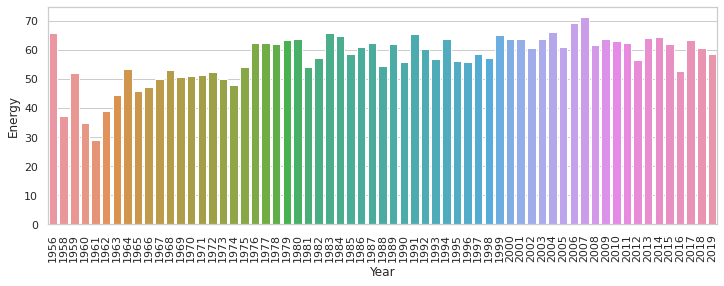

In [23]:
plt.figure(figsize=(12,4))
ax = sns.barplot(data=df_avg, x='Year', y='Energy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

**Dado que el dataset contiene más de 2,000 registros, acortaremos la revisión a al top 100**

In [26]:
df_Top_100 = df.sort_values(by='Popularity', ascending=False, ignore_index=True).nlargest(100,'Popularity')

In [27]:
df_Top_100

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Dance Monkey,Tones and I,australian pop,2019,98,59,82,-6,15,51,209,69,9,100
1,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,98
2,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,95
3,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150,63,34,-7,7,35,241,16,4,95
4,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,With Or Without You - Remastered,U2,irish rock,1987,110,43,54,-12,14,11,296,0,3,80
96,Just the Way You Are,Bruno Mars,dance pop,2010,109,84,64,-5,9,43,221,2,4,80
97,You Say,Lauren Daigle,ccm,2018,148,63,49,-7,9,8,275,68,3,80
98,Snow (Hey Oh),Red Hot Chili Peppers,alternative rock,2006,105,90,43,-4,12,60,335,12,5,80


**Agregando una columna que permita realizar la clasificacion y agrupacion por Bins de 10 canciones**

In [28]:
df_Top_100['Top'] = ''

In [29]:
df_Top_100.iloc[:10,14] = '01-10'
df_Top_100.iloc[10:20,14] = '11-20'
df_Top_100.iloc[20:30,14] = '21-30'
df_Top_100.iloc[30:40,14] = '31-40'
df_Top_100.iloc[40:50,14] = '41-50'
df_Top_100.iloc[50:60,14] = '51-60'
df_Top_100.iloc[60:70,14] = '61-70'
df_Top_100.iloc[70:80,14] = '71-80'
df_Top_100.iloc[80:90,14] = '81-90'
df_Top_100.iloc[90:100,14] = '91-100'

In [ ]:
df_Top_100.head(50)

**Para analizar correctamente la información realizaremos la agrupación de los datos promediando por Bin**

In [ ]:
avg_df_top_100 = df_Top_100.groupby('Top', as_index=False).mean()
avg_df_top_100

**Creamos una variable para el top 500, 20 y 10**

In [41]:
df_Top_500 = df.sort_values(by='Popularity', ascending=False, ignore_index=True).nlargest(500,'Popularity')

In [47]:
df_Top_20 = df.sort_values(by='Popularity', ascending=False, ignore_index=True).nlargest(20,'Popularity')

In [49]:
df_Top_10 = df.sort_values(by='Popularity', ascending=False, ignore_index=True).nlargest(10,'Popularity')

###Gráficos

**Agrupando por año para saber la distribución de las 100 canciones más populares**

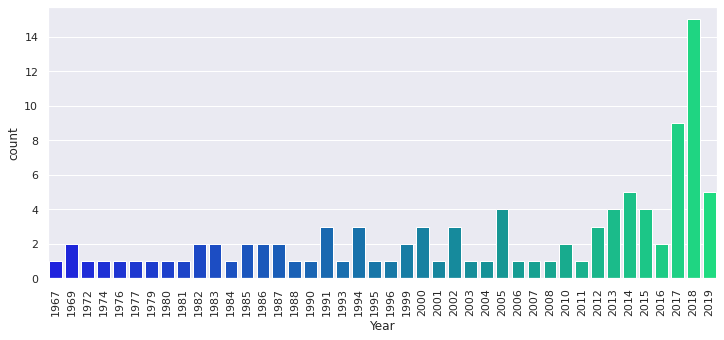

In [43]:
plt.figure(figsize=(12, 5))
sns.set_theme(style='darkgrid')
sns.countplot(data=df_Top_100, x='Year', palette='winter')
plt.xticks(rotation=90);

**Visualizando el conteo a través de un gráfico de distribución**

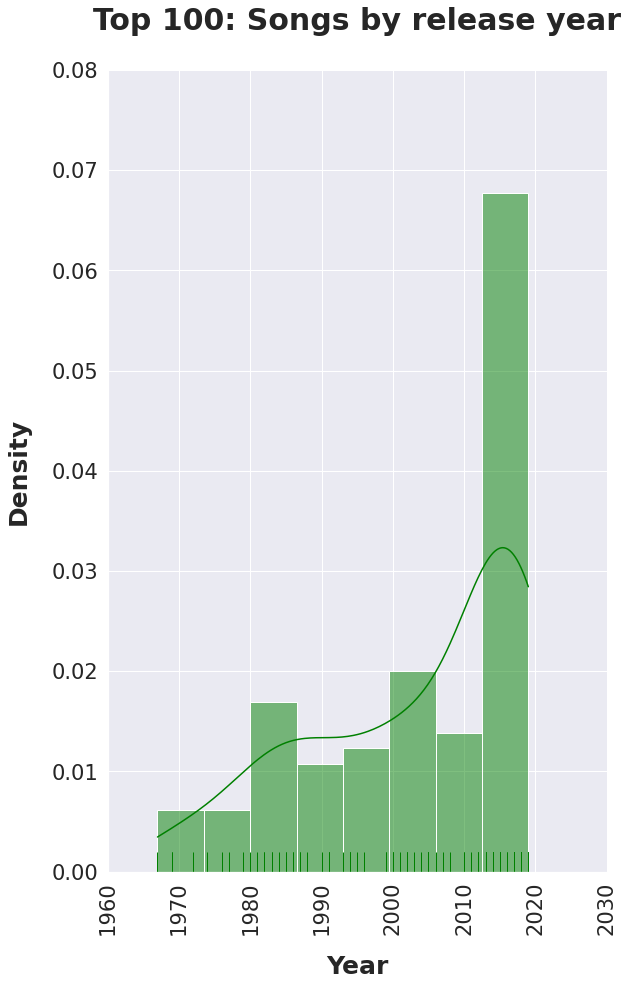

In [44]:
c = sns.displot(df_Top_100, x="Year",
            kde=True,
            stat='density',
            color='green',
            rug='true',
            height=12,
            aspect=12/18,
            #palette='winter'
            #kde_kws=dict(cut=0.05)
            
            );
c.set_xticklabels(size=21)
c.set_xlabels(size=25, labelpad=20, weight='bold')
c.set_yticklabels(size=21)
c.set_ylabels(size=25, labelpad=20, weight='bold')
plt.xticks(rotation=90)
plt.title('Top 100: Songs by release year', fontsize=30, pad=40, fontweight='bold'); # Formato titulo

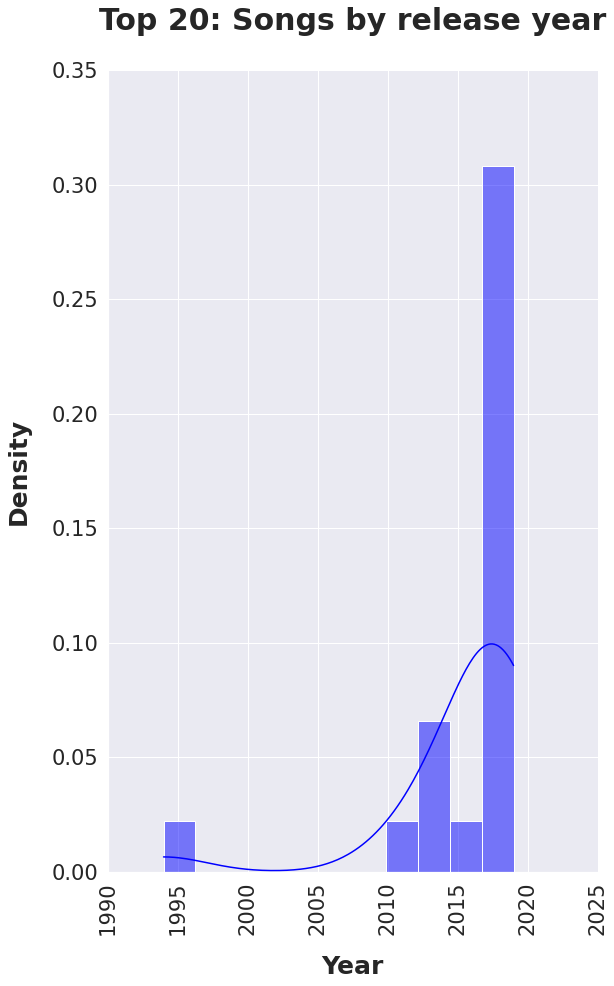

In [52]:
c = sns.displot(df_Top_20, x="Year",
            kde=True,
            stat='density',
            color='blue',
            #rug='true',
            height=12,
            aspect=12/18,
            #palette='winter'
            #kde_kws=dict(cut=0.05)
            
            );
c.set_xticklabels(size=21)
c.set_xlabels(size=25, labelpad=20, weight='bold')
c.set_yticklabels(size=21)
c.set_ylabels(size=25, labelpad=20, weight='bold')
plt.xticks(rotation=90)
plt.title('Top 20: Songs by release year', fontsize=30, pad=40, fontweight='bold'); # Formato titulo

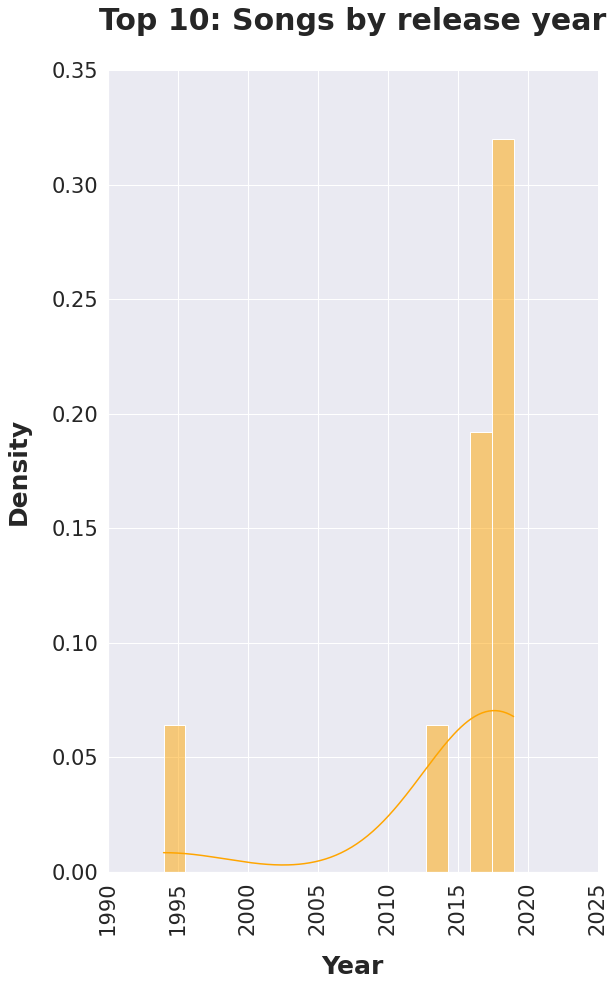

In [51]:
c = sns.displot(df_Top_10, x="Year",
            kde=True,
            stat='density',
            color='orange',
            #rug='true',
            height=12,
            aspect=12/18,
            #palette='winter'
            #kde_kws=dict(cut=0.05)
            
            );
c.set_xticklabels(size=21)
c.set_xlabels(size=25, labelpad=20, weight='bold')
c.set_yticklabels(size=21)
c.set_ylabels(size=25, labelpad=20, weight='bold')
plt.xticks(rotation=90)
plt.title('Top 10: Songs by release year', fontsize=30, pad=40, fontweight='bold'); # Formato titulo

**Agrupando por género**

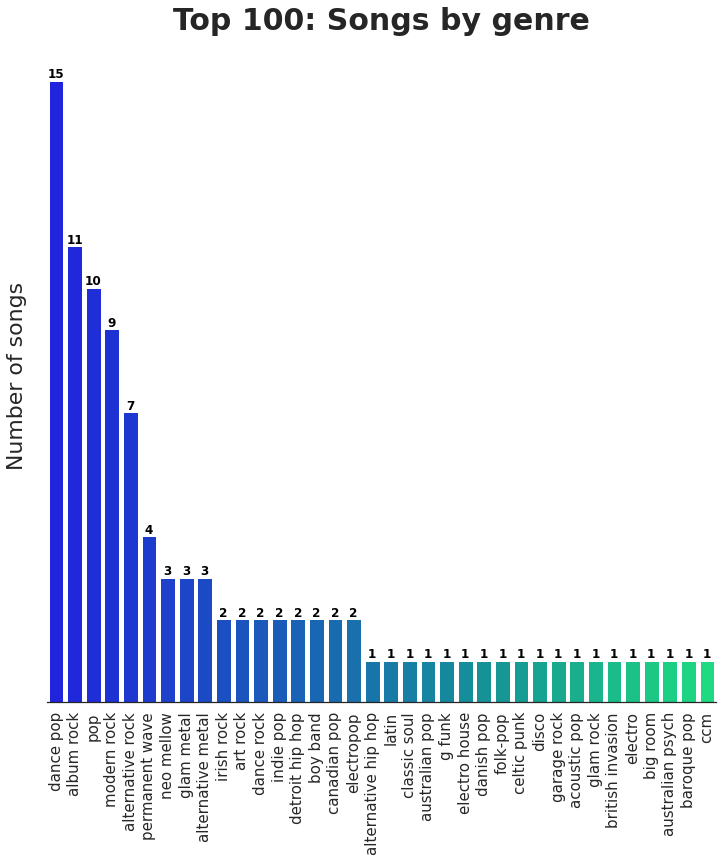

In [68]:
plt.figure(figsize=(12, 12))
b = sns.countplot(data=df_Top_100, x='Top Genre', palette='winter',order = df_Top_100['Top Genre'].value_counts().index)
plt.xticks(rotation=90)
b.axes.set_title('Top 100: Songs by genre', fontsize=30, pad=20, fontweight='bold') # Formato titulo
plt.xlabel('', fontsize=12) #Formato titulo eje x
plt.ylabel('Number of songs', fontsize=22, labelpad=10) #Formato titulo eje y
b.tick_params(axis='both', which='major', labelsize=15) #cambiar tamano de la etiquetas eje X
b.set_yticklabels([]) # Eliminar etiquetas columna y

for p in b.patches:
  b.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=12, weight='bold')
  
sns.despine(left=True);

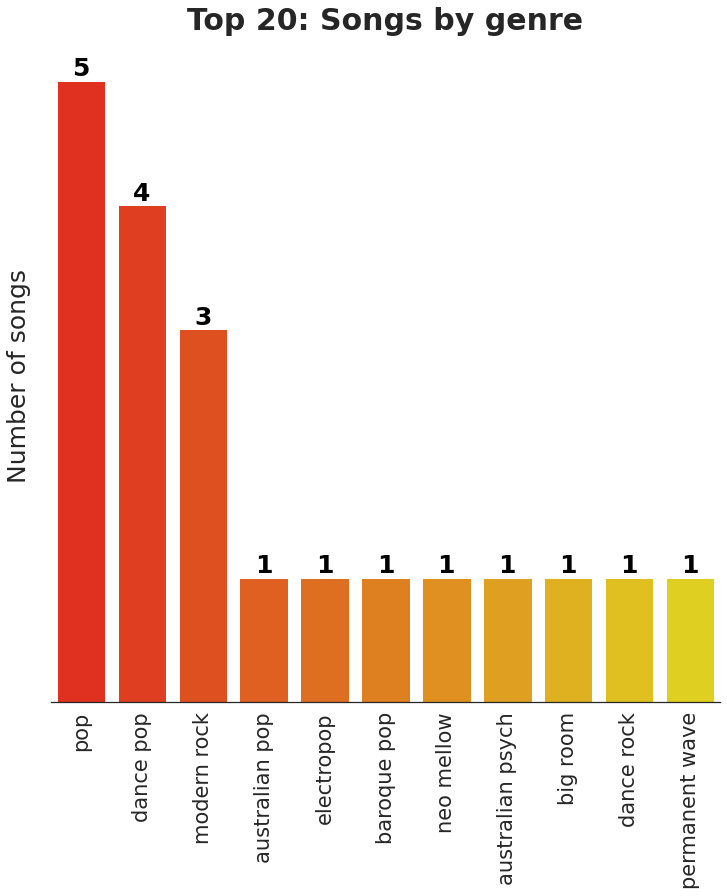

In [64]:
plt.figure(figsize=(12, 12))
sns.set_theme(style='white')

a = sns.countplot(data=df_Top_20, x='Top Genre', palette='autumn',order = df_Top_20['Top Genre'].value_counts().index)
plt.xticks(rotation=90)
a.axes.set_title('Top 20: Songs by genre', fontsize=30, pad=20, fontweight='bold') # Formato titulo
plt.xlabel('', fontsize=12) #Formato titulo eje x
plt.ylabel('Number of songs', fontsize=25, labelpad=10) #Formato titulo eje y
a.tick_params(axis='both', which='major', labelsize=21) #cambiar tamano de la etiquetas eje X
a.set_yticklabels([]) # Eliminar etiquetas columna y

for p in a.patches:
  a.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=25, weight='bold')
  
sns.despine(left=True);

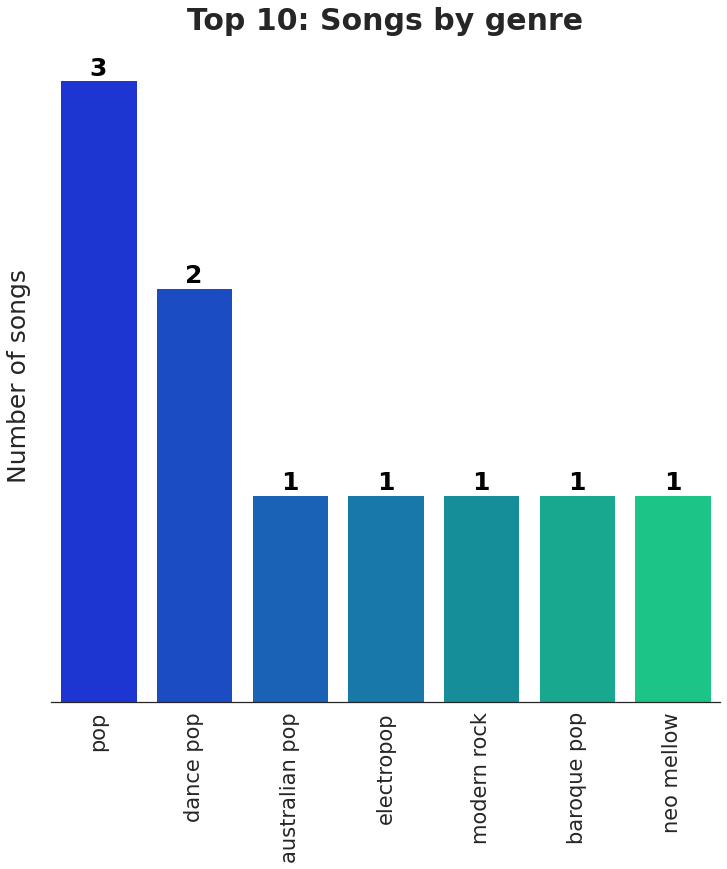

In [56]:
plt.figure(figsize=(12, 12))
sns.set_theme(style='white')

a = sns.countplot(data=df_Top_10, x='Top Genre', palette='winter',order = df_Top_10['Top Genre'].value_counts().index)
plt.xticks(rotation=90)
a.axes.set_title('Top 10: Songs by genre', fontsize=30, pad=20, fontweight='bold') # Formato titulo
plt.xlabel('', fontsize=12) #Formato titulo eje x
plt.ylabel('Number of songs', fontsize=25, labelpad=10) #Formato titulo eje y
a.tick_params(axis='both', which='major', labelsize=21) #cambiar tamano de la etiquetas eje X
a.set_yticklabels([]) # Eliminar etiquetas columna y

for p in a.patches:
  a.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=25, weight='bold')
  
sns.despine(left=True);

**Polarplot - Performance de la canción**

Para la creación de este tipo de gráfico es necesario realizar la estandarización de los valores para mantener el valor de los ejes constantes y que puedan ser comparables.

In [32]:
avg_df_top_100_adjusted = avg_df_top_100.copy()

Ajustaremos en proporción de 10 las columnas Loudnes, Speechiness y Length.

In [33]:
avg_df_top_100_adjusted['Loudness (dB)'] = avg_df_top_100_adjusted['Loudness (dB)']*-10

In [34]:
avg_df_top_100_adjusted['Speechiness'] = avg_df_top_100_adjusted['Speechiness']*10

In [35]:
avg_df_top_100_adjusted['Length (Duration)'] = avg_df_top_100_adjusted['Length (Duration)']/10

In [ ]:
avg_df_top_100_adjusted

LLamamos al complemento de Plotly 

In [37]:
import plotly.graph_objects as go

In [38]:
  categories = ['BPM',	'Energy',	'Danceability',	'Loudness (dB)',	'Liveness',	'Valence', 'Length',	'Acousticness',	'Speechiness',	'Popularity']

fig = go.Figure()

fig.add_trace(go.Scatterpolar( # Estos son los valores promedios por Bin y variable
      r=[108.8,	54.0,	64.0,	60.0,	11.0,	50.9,	22.11,	43.0,	91.0,	91.1],
      theta=categories,
      fill='toself',
      name='Top 1-10'
))
fig.add_trace(go.Scatterpolar( # Estos son los valores promedios por Bin y variable
      r=[121.7,	57.5,	62.1,	82.0,	12.9,	55.7,	25.66,	15.1,	41.0,	82.0],
      theta=categories,
      fill='toself',
      name='Top 41-50'
))
fig.add_trace(go.Scatterpolar( # Estos son los valores promedios por Bin y variable
      r=[118.1,	66.0,	55.3,	75.0,	16.2,	37.8,	25.81,	25.8,	42.0,	79.9],
      theta=categories,
      fill='toself',
      name='Top 91-100'
))

fig.update_layout(autosize=False,
    width=850,
    height=850,
    title='Average songs performance',
    title_font_size=25,
    legend_font_size=20,
    font=dict(size=18),
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 150]
    )),
  showlegend=True
)

fig.show()

**Grafico comparando canciones Top 1-50-100**

Crearemos una vista que nos permita tomar la info de las canciones

In [ ]:
df_Top_100.loc[49:100,['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']]

In [42]:
df_Top_500.loc[499:500,['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']]

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
499,Learning To Fly,Tom Petty and the Heartbreakers,album rock,1991,117,77,65,-10,36,95,242,21,3,71


Procedemos a graficar

In [39]:
 categories = ['BPM',	'Energy',	'Danceability',	'Loudness (dB)',	'Liveness',	'Valence', 'Length',	'Acousticness',	'Speechiness',	'Popularity']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[98,	59,	82,	60,	15,	51,	20.9,	69,	90, 100],
      theta=categories,
      fill='toself',
      name='No.1: Dance Monkey - Tones and I'
))
fig.add_trace(go.Scatterpolar(
      r=[85,	53,	55,	80,	22,	41,	27.2,	19,	30,	82],
      theta=categories,
      fill='toself',
      name='No.50: Do I Wanna Know? - Arctic Monkeys'
))
fig.add_trace(go.Scatterpolar(
      r=[85,	94,	44,	30,	9,	78,	18.2,	0,	60,	79],
      theta=categories,
      fill='toself',
      name='No.100: Basket Case - Green Day	'
))
fig.add_trace(go.Scatterpolar(
      r=[117,	77,	65,	100,	36,	95,	24.2,	21,	30,	71],
      theta=categories,
      fill='toself',
      name='No.500: Learning To Fly - Tom Petty'
))

fig.update_layout(autosize=False,
    width=1200,
    height=1200,
    title='Songs performance',
    title_font_size=25,
    legend_font_size=20,
    font=dict(size=18),
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 150]
    )),
  showlegend=True,
)

fig.show()

**Finalmente obtendremos la tabla y matriz de correlación**

In [14]:
df.corr()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Year,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.050346,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,0.006252,-0.122472,0.085598,-0.003181
Energy,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,0.022800,-0.665156,0.205865,0.103393
Danceability,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135432,-0.135769,0.125229,0.144344
Loudness (dB),0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.056127,-0.451635,0.125090,0.165527
Liveness,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,0.032499,-0.046206,0.092594,-0.111978
Valence,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.203690,-0.239729,0.107102,0.095911
Length (Duration),-0.050346,0.006252,0.022800,-0.135432,-0.056127,0.032499,-0.203690,1.000000,-0.102319,-0.027826,-0.065403
Acousticness,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,-0.102319,1.000000,-0.098256,-0.087604
Speechiness,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.027826,-0.098256,1.000000,0.111689


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


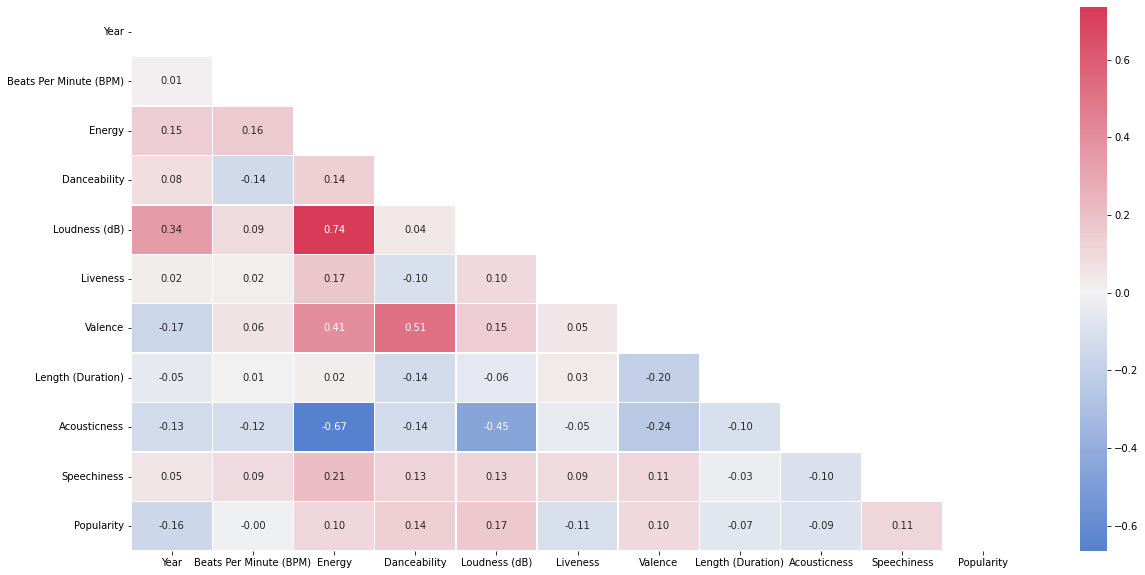

In [16]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(255, 6, as_cmap=True)

figure = sns.heatmap(df.corr(), mask=mask, cmap=cmap,
                     center=0, linewidths=0.5,
                     annot=True, fmt='.2f'
                     );

## Fuentes

https://themusicnetwork.com/music-streaming-market-diversifies/

https://www.midiaresearch.com/blog/music-subscriber-market-shares-q2-2021

https://www.statista.com/statistics/653926/music-streaming-service-subscriber-share/

https://kommandotech.com/statistics/spotify-user-statistics/

https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset